In [53]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('output/impact_data_2013.csv')
df.date = pd.to_datetime(df.date)
df = df.drop(columns=['Unnamed: 0'])

In [55]:
df.tail()

,affected_population,date,district
2635,25.0,2013-12-29,SOROTI
2636,10.0,2013-12-30,AMURIA
2637,5.0,2013-12-30,KATAKWI
2638,5.0,2013-12-30,NGORA
2639,5.0,2013-12-30,SOROTI


In [57]:
dr = pd.date_range(start='1/1/2013', end='31/12/2013')
for district in df.district.unique():
    for date in dr:
        if date not in df[df.district==district].date:
            df = df.append(pd.Series({'affected_population': 0.0, 'date': date, 'district': district}), ignore_index=True)
print(df.tail())

       affected_population       date  district
31105                  0.0 2013-12-27  ISINGIRO
31106                  0.0 2013-12-28  ISINGIRO
31107                  0.0 2013-12-29  ISINGIRO
31108                  0.0 2013-12-30  ISINGIRO
31109                  0.0 2013-12-31  ISINGIRO


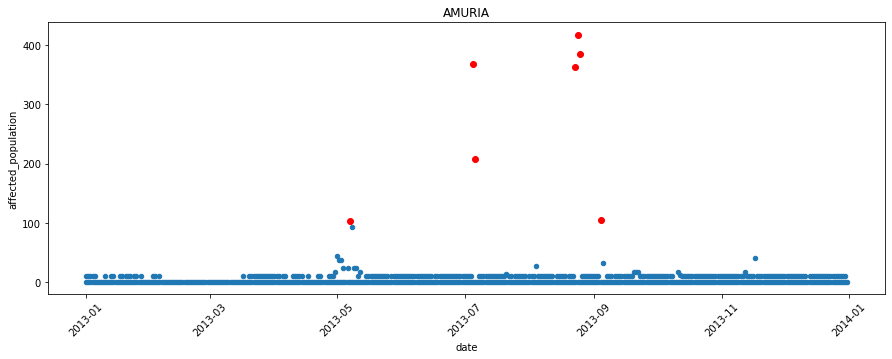

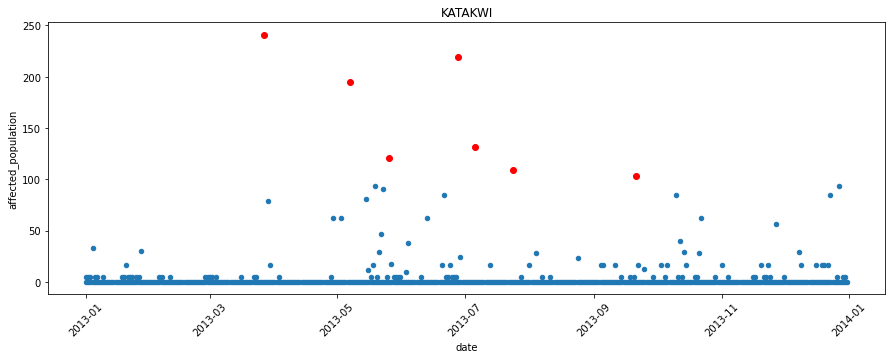

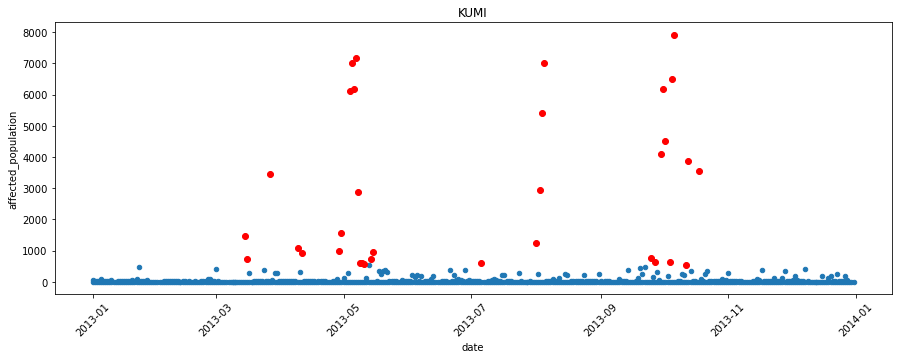

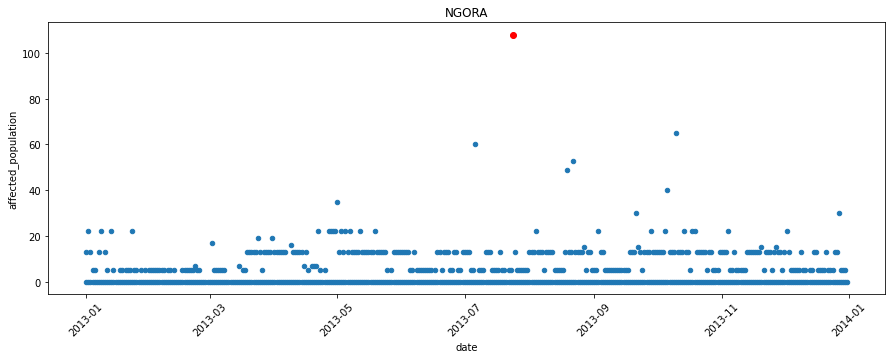

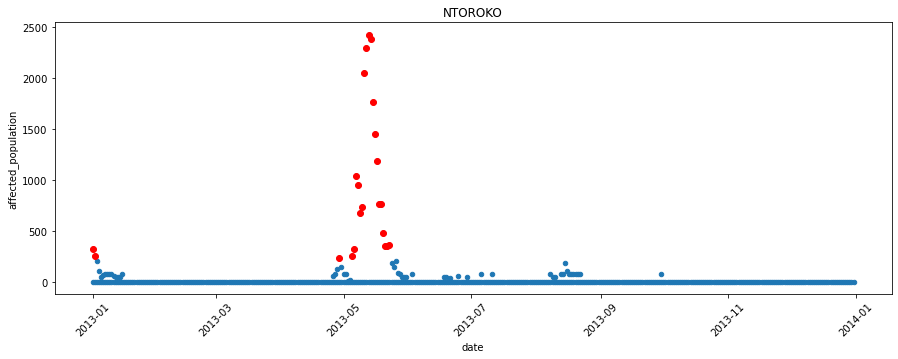

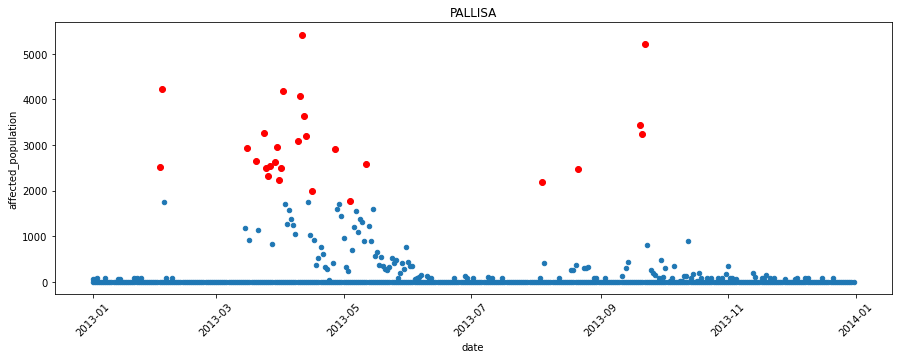

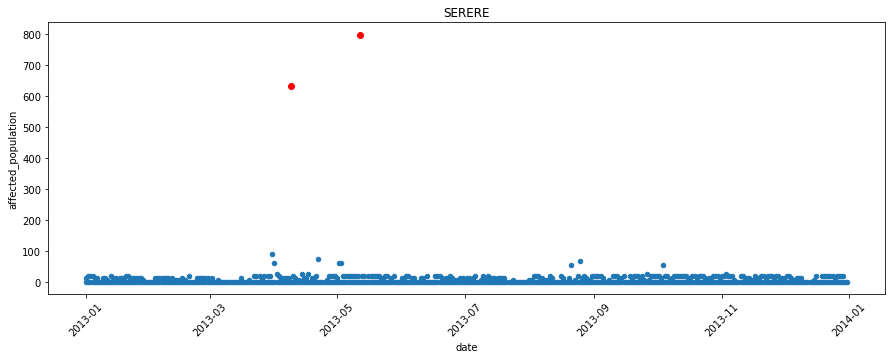

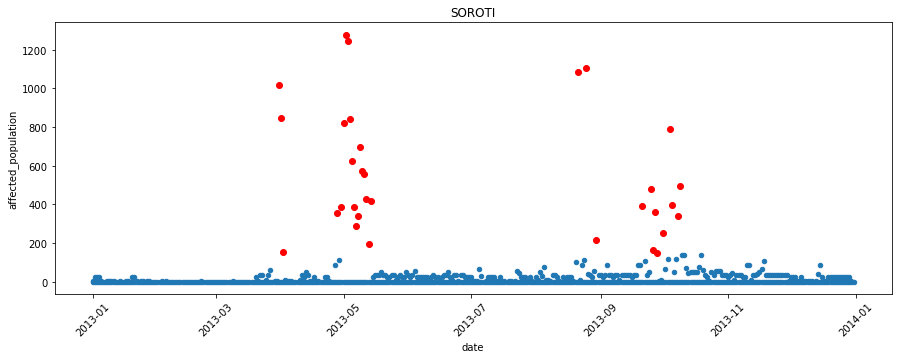

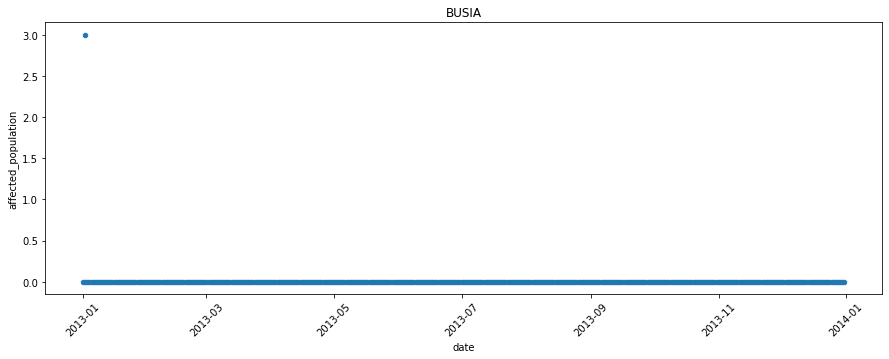

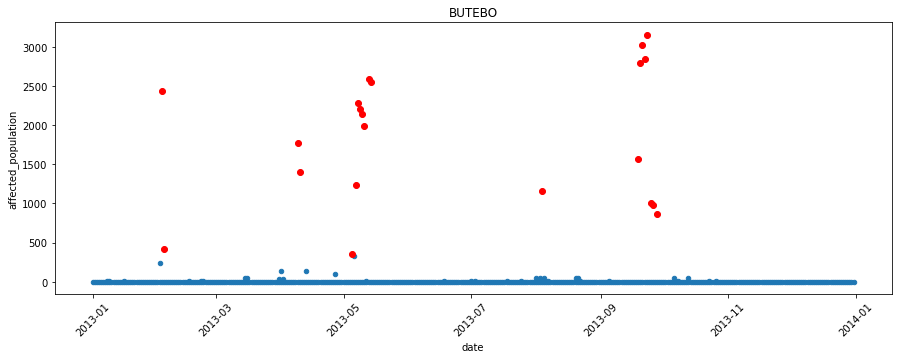

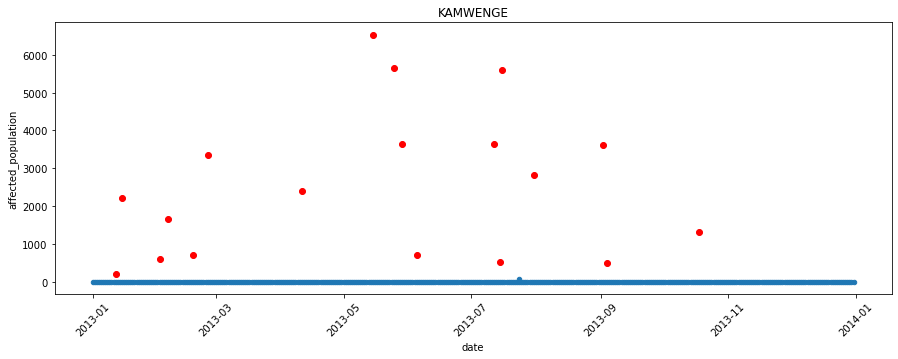

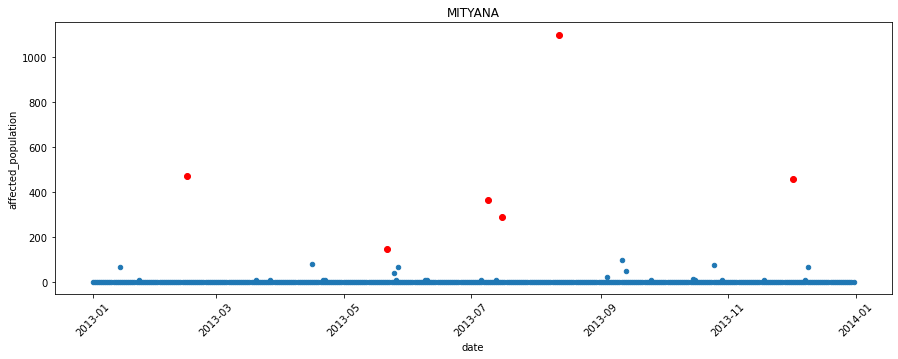

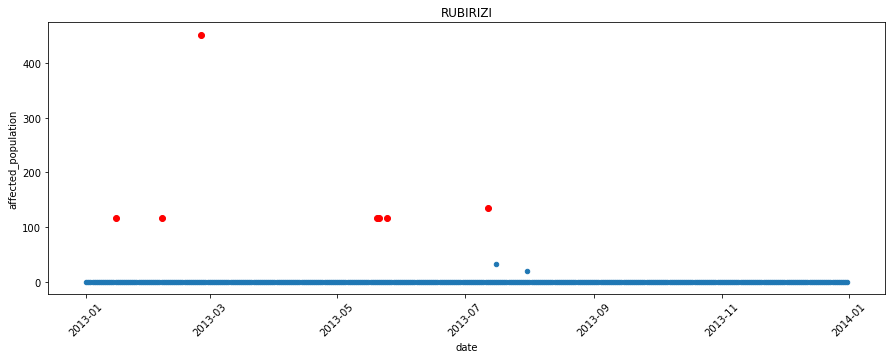

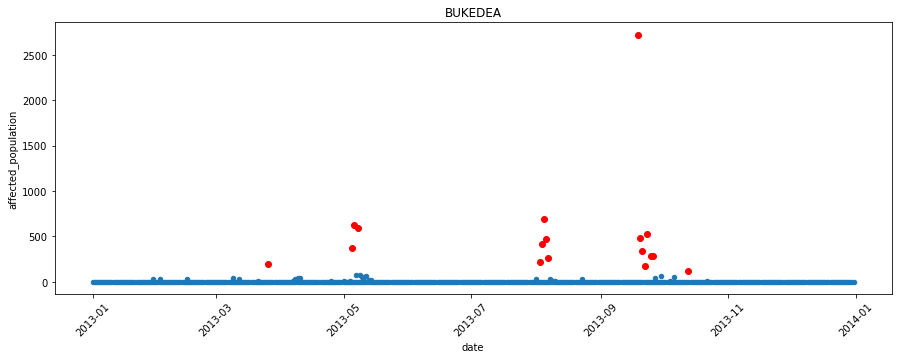

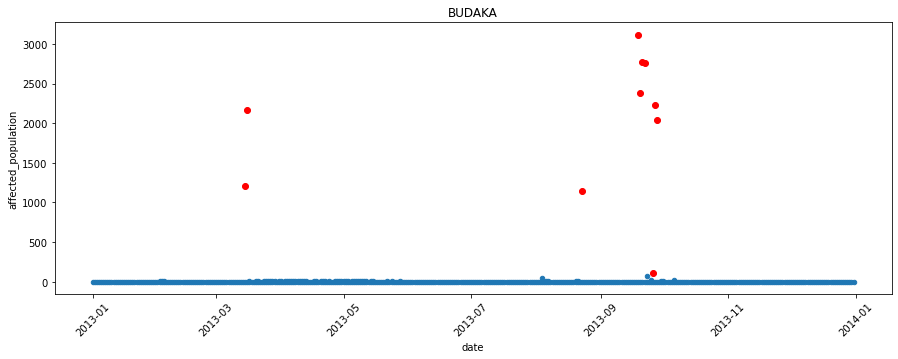

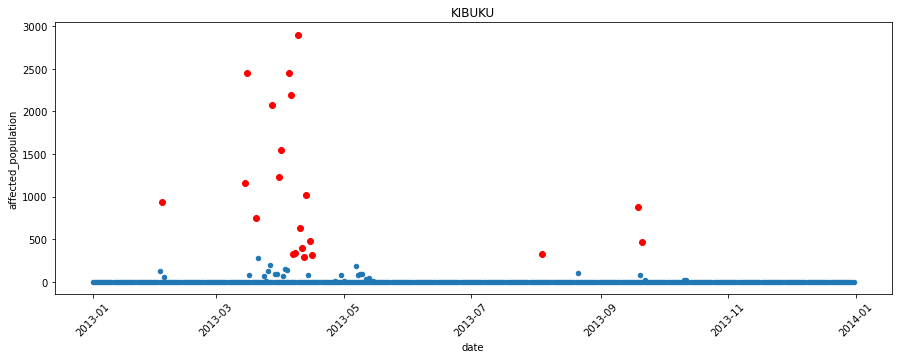

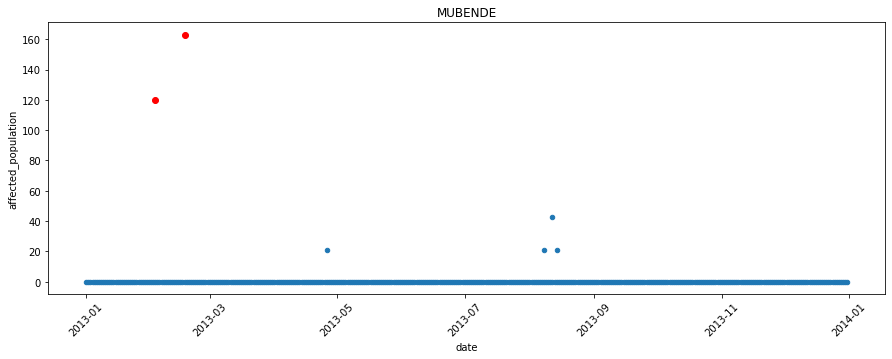

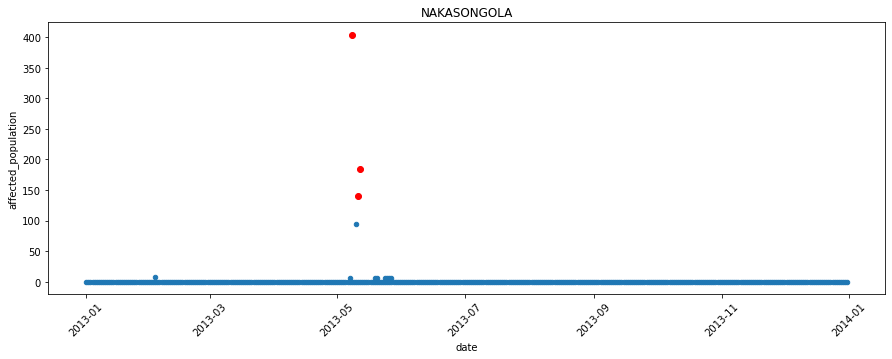

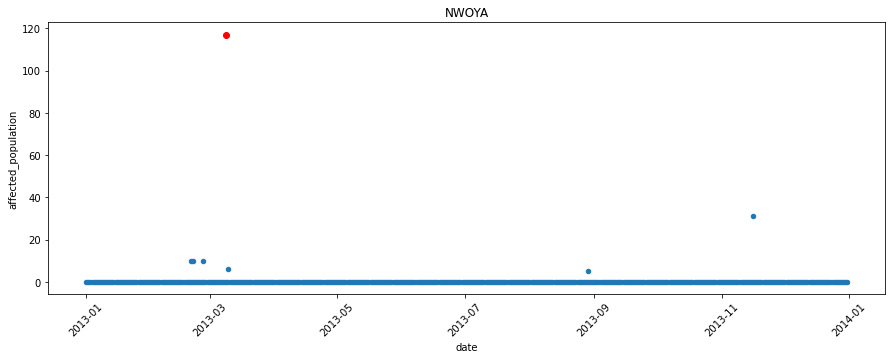

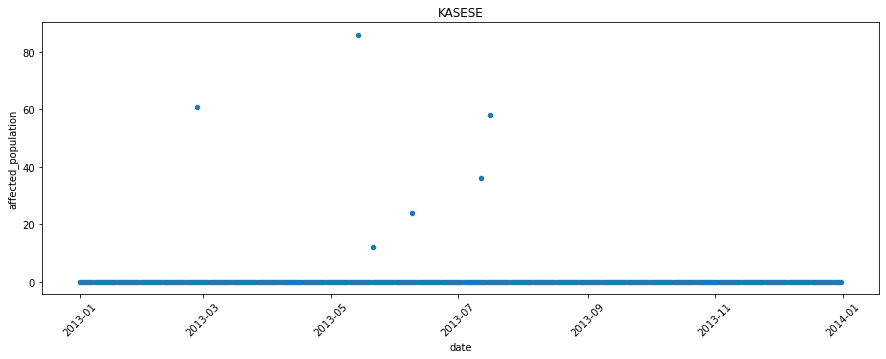

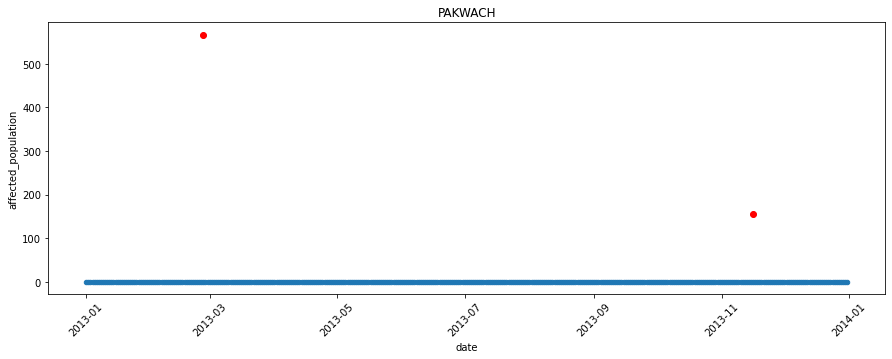

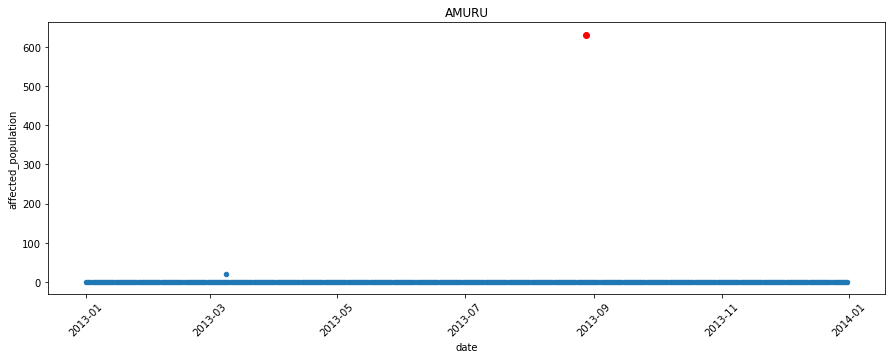

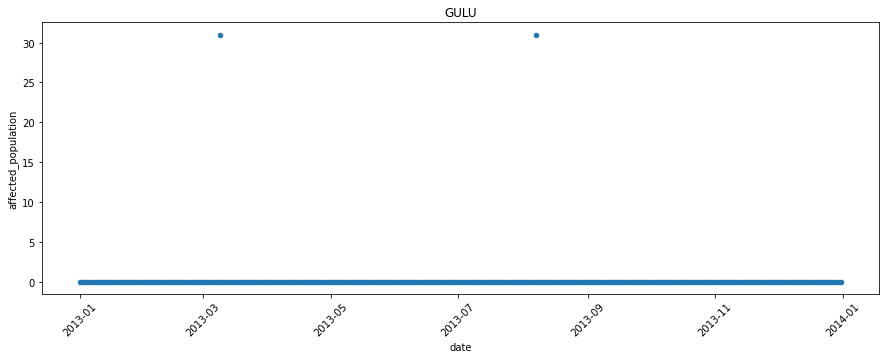

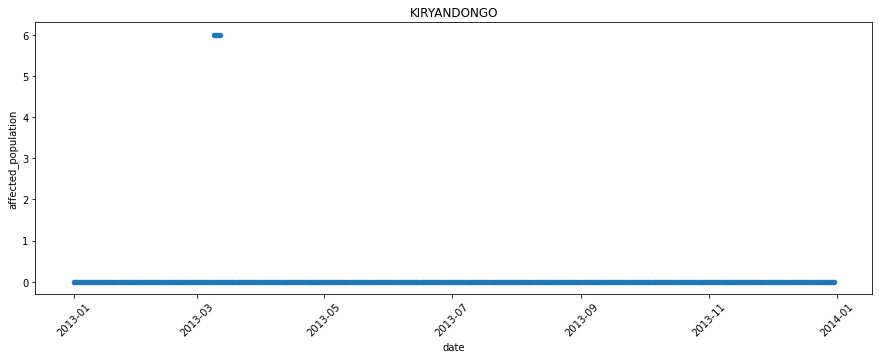

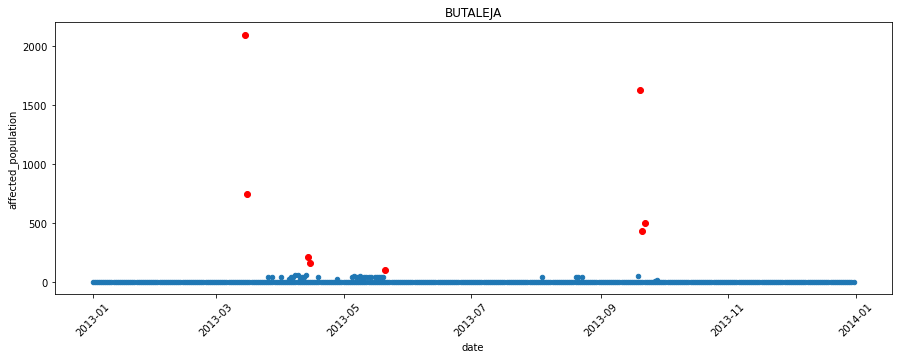

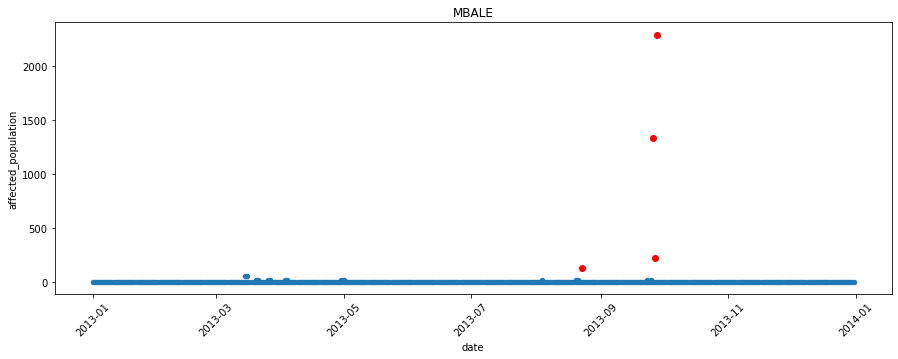

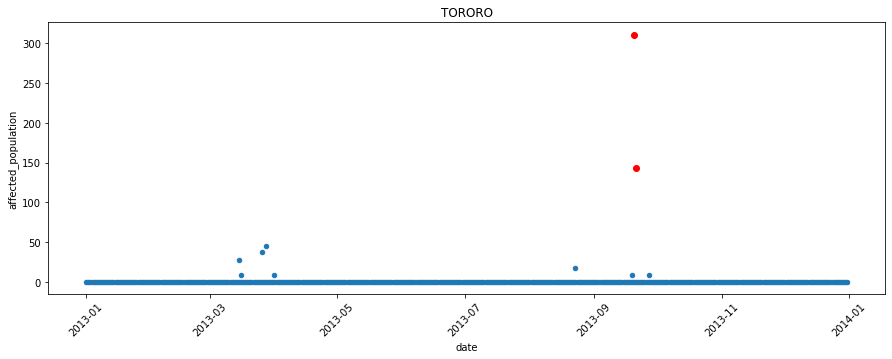

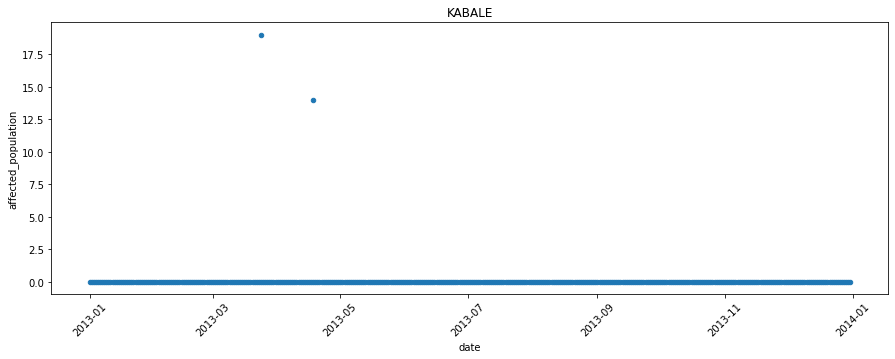

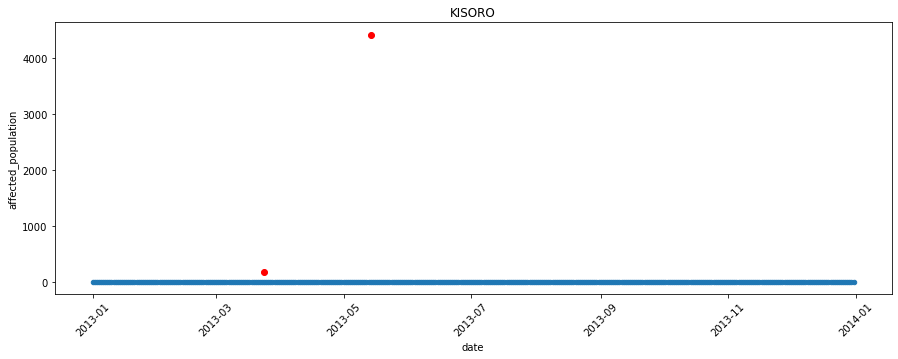

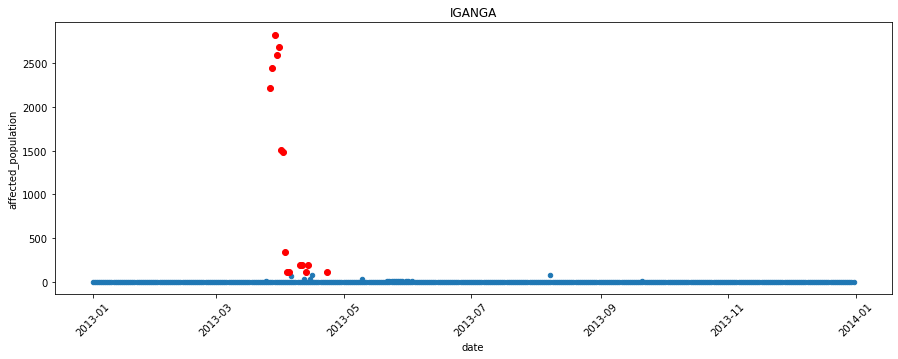

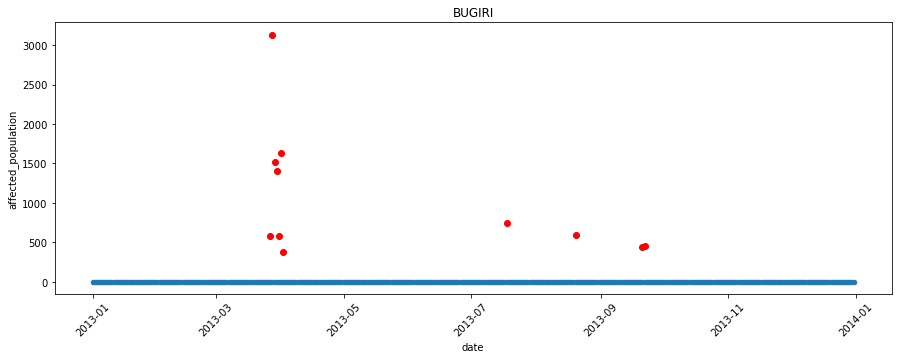

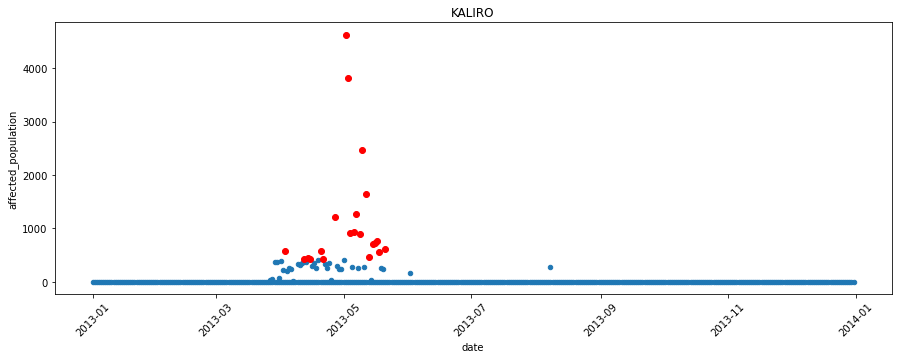

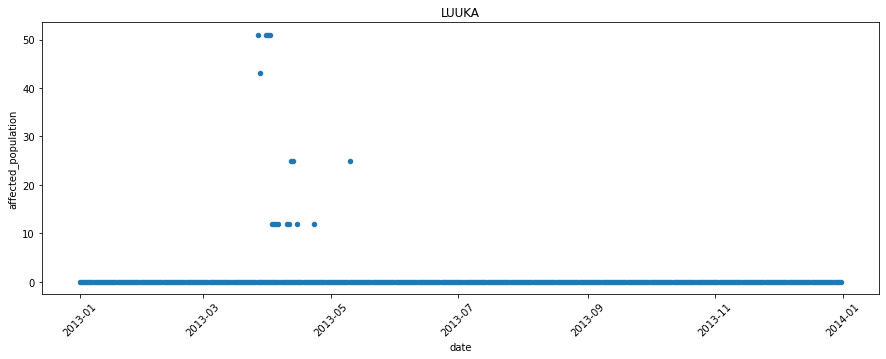

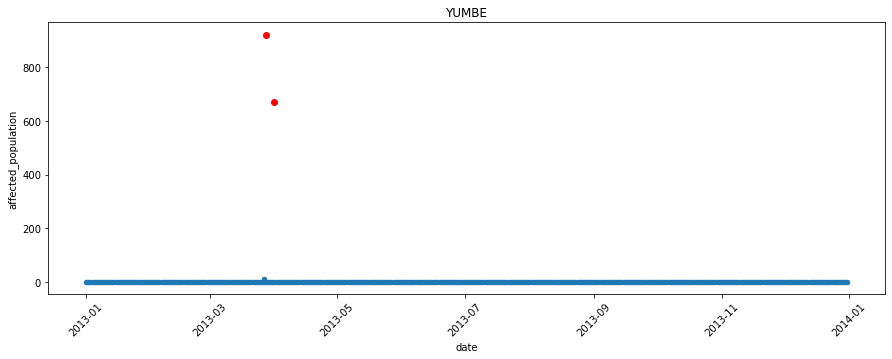

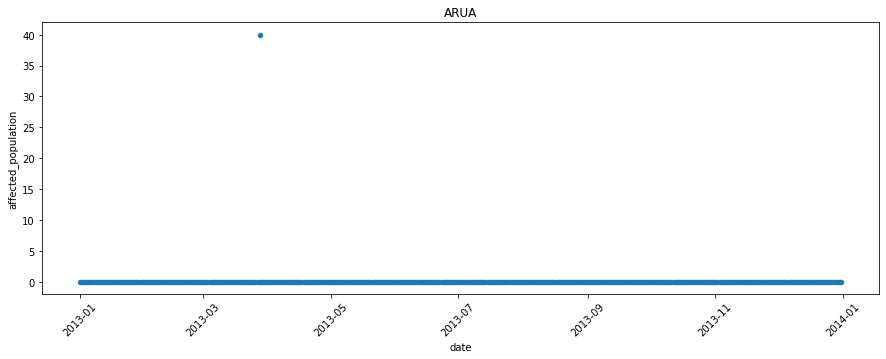

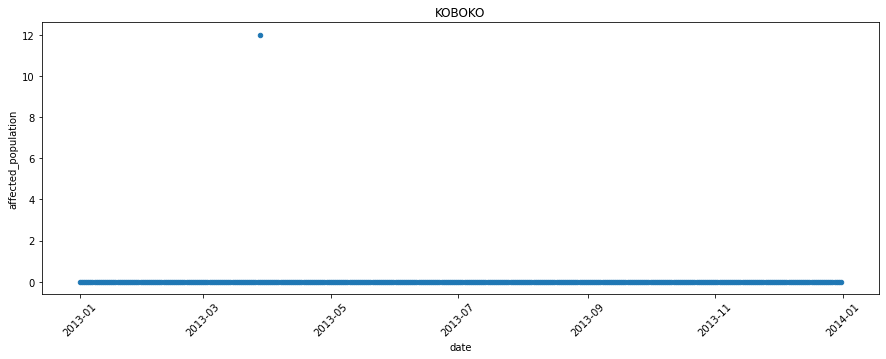

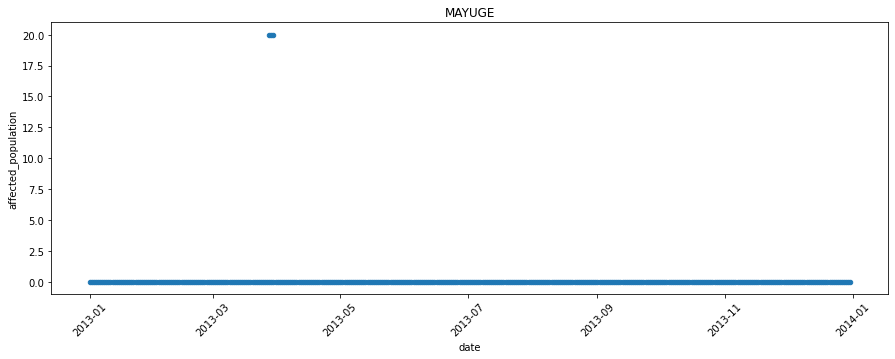

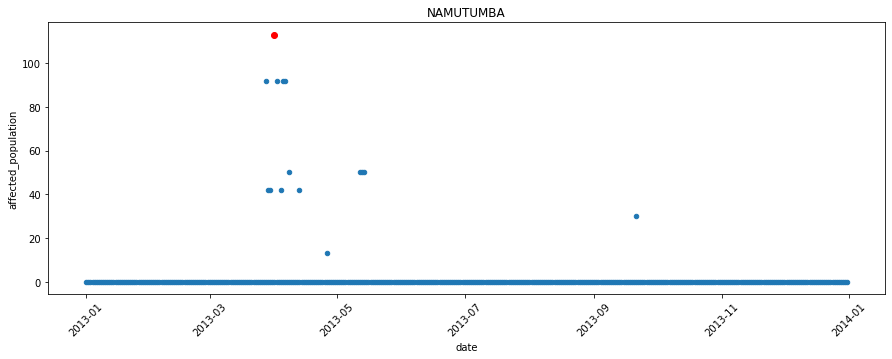

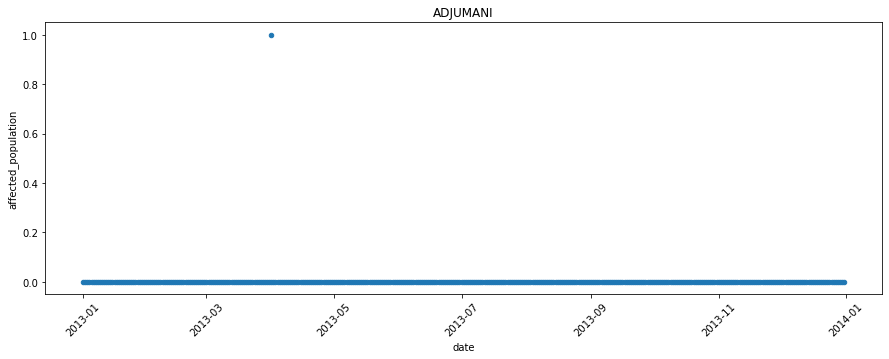

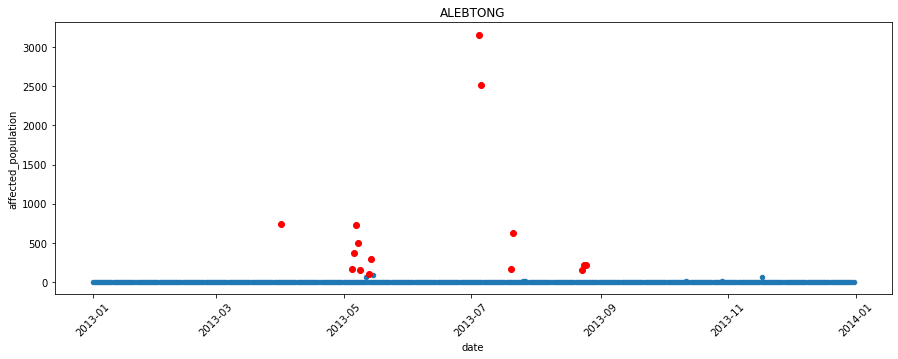

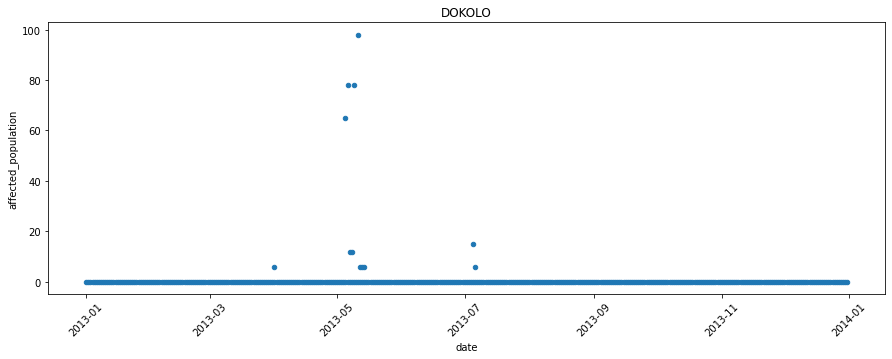

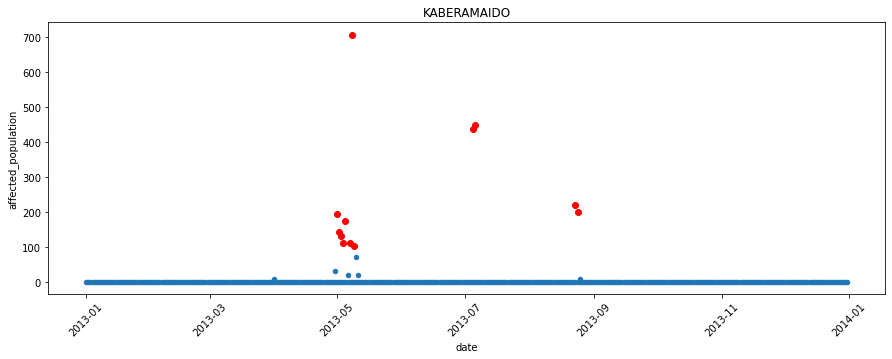

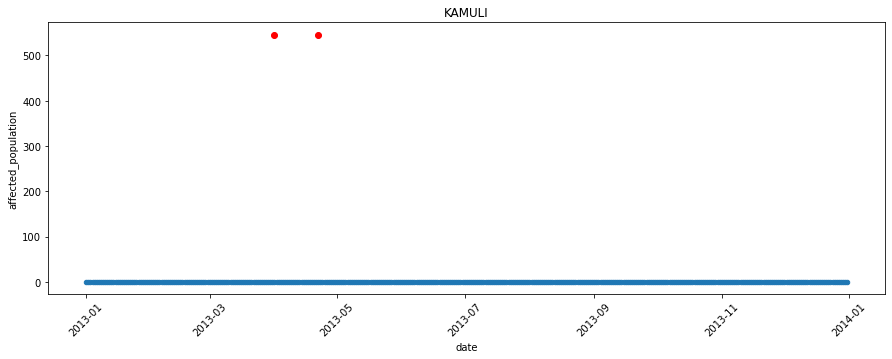

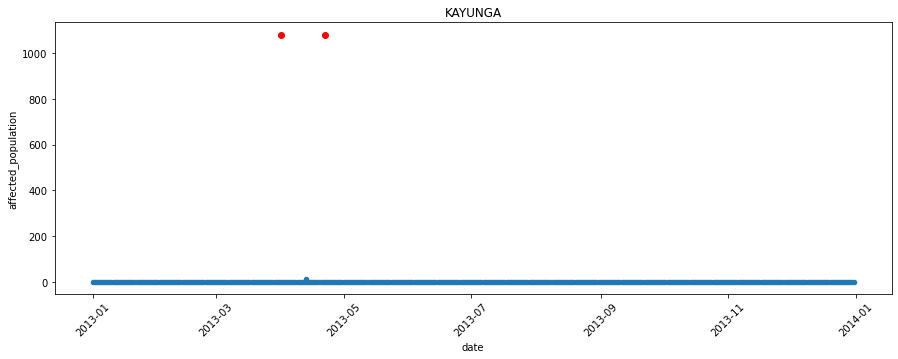

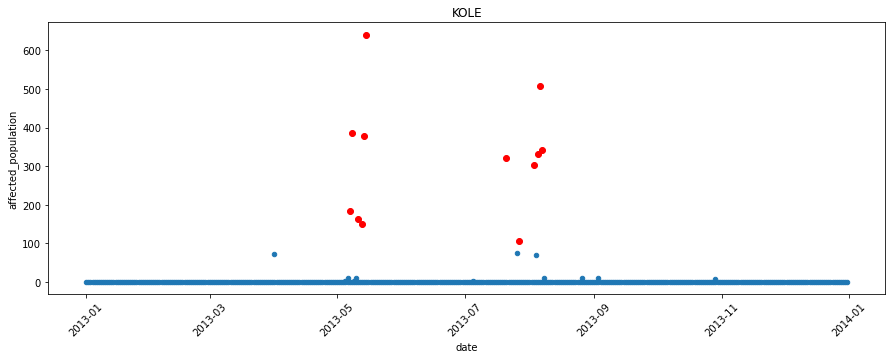

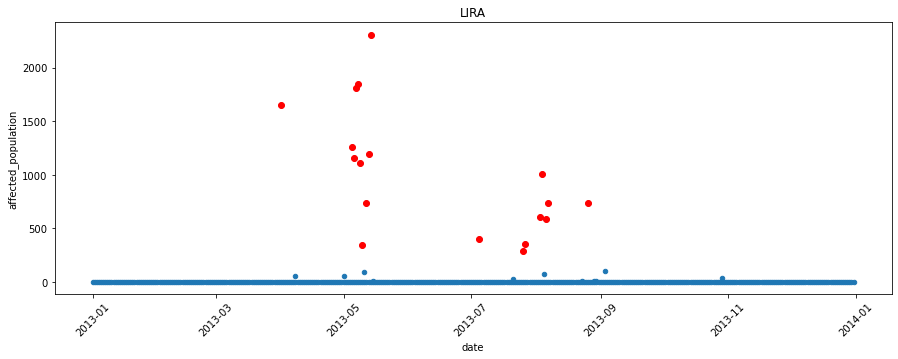

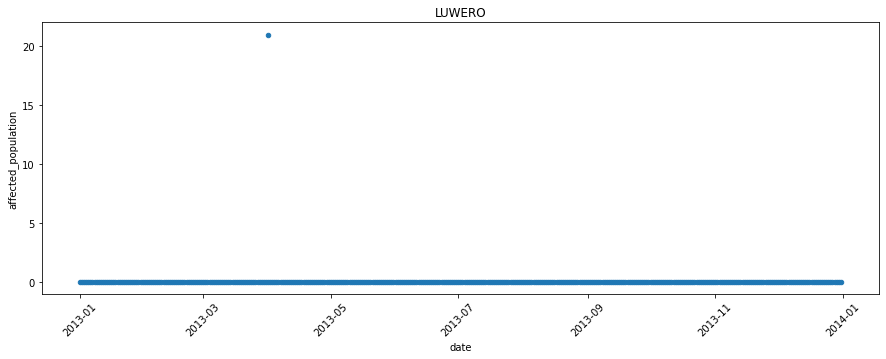

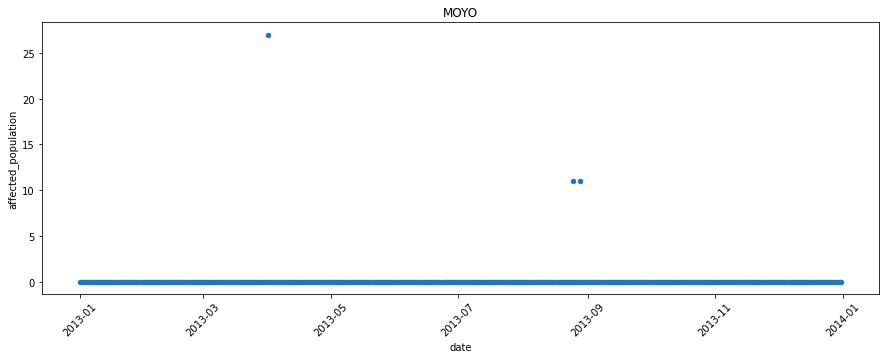

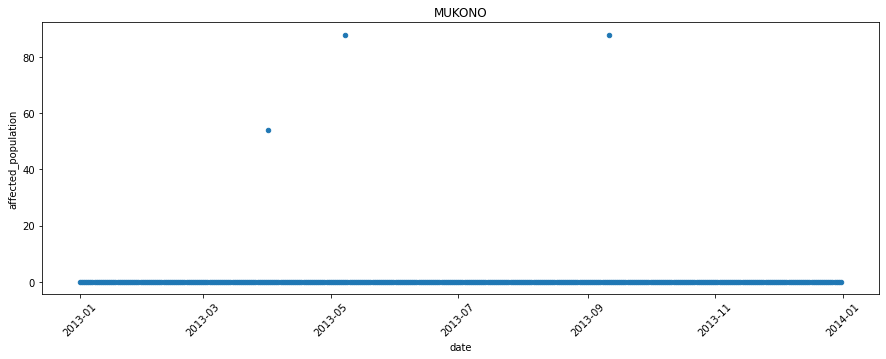

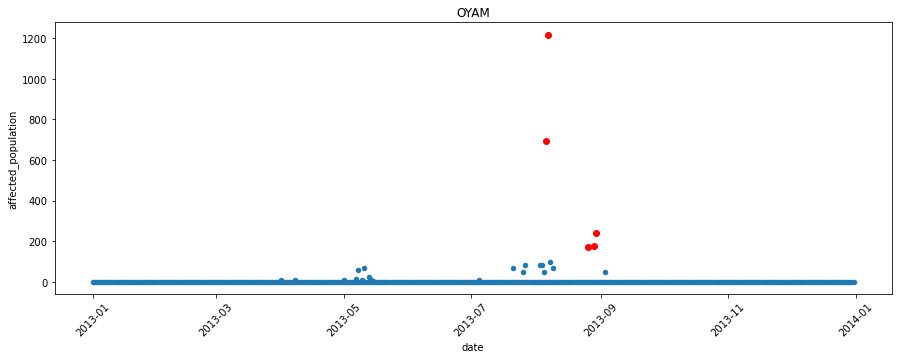

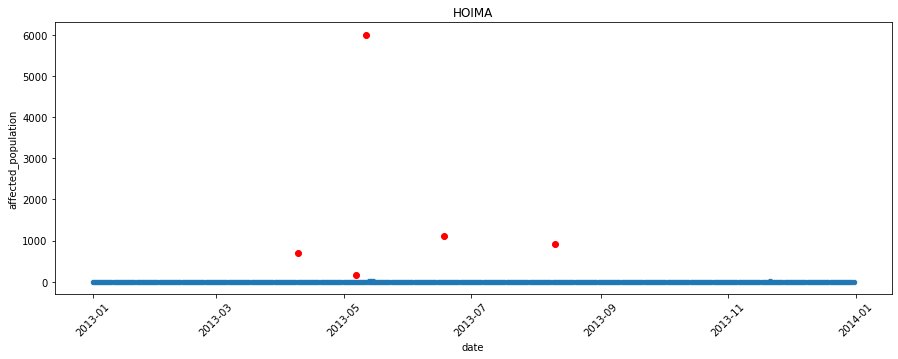

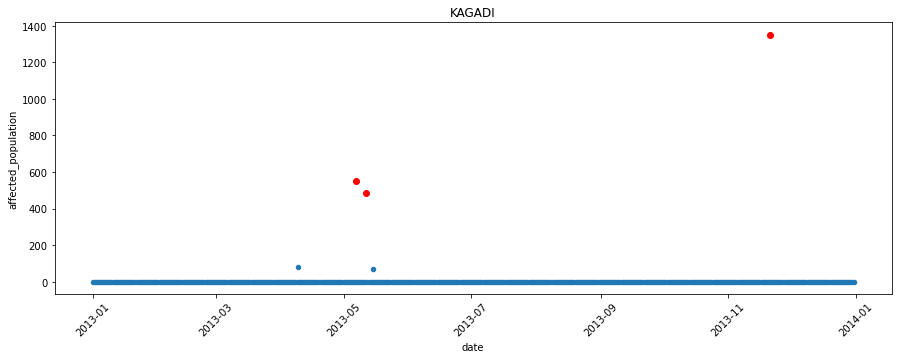

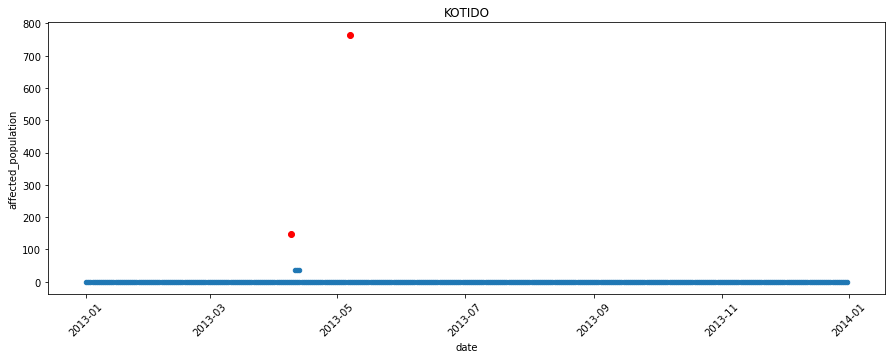

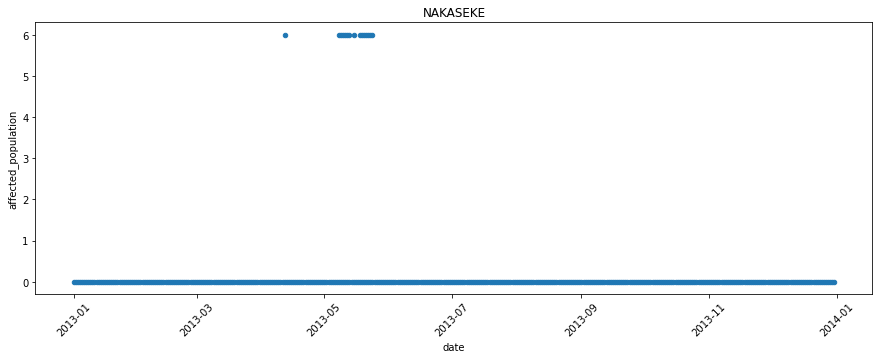

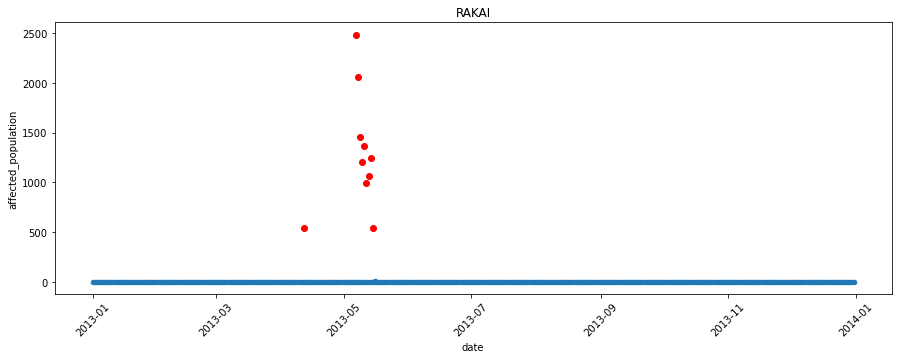

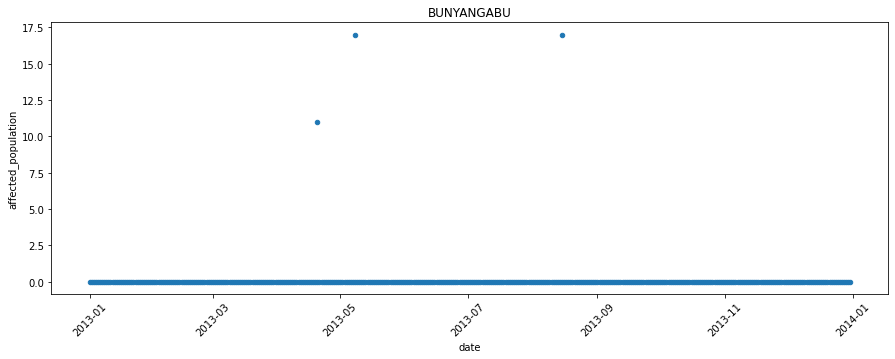

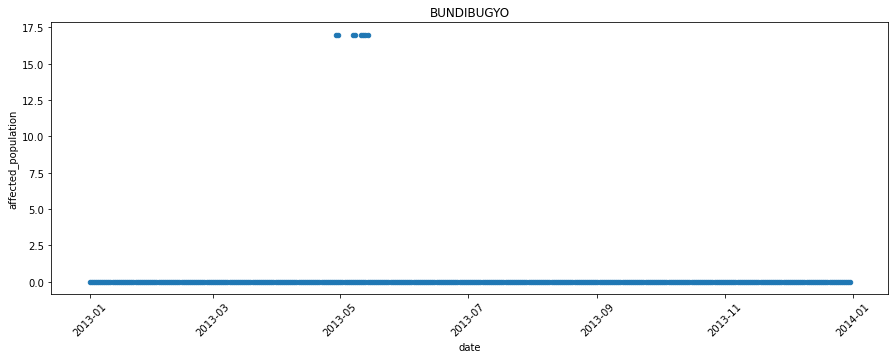

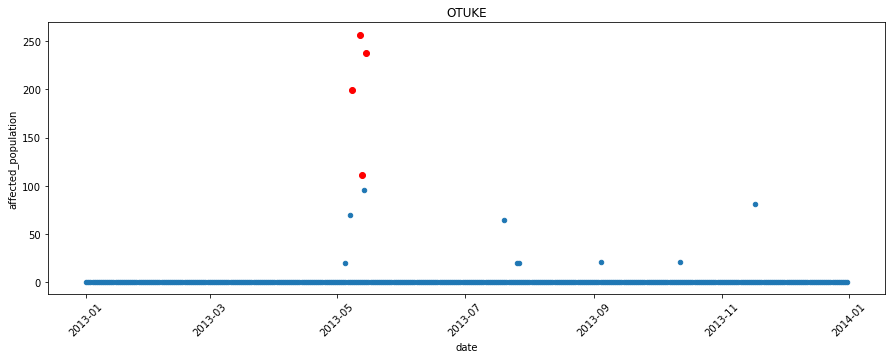

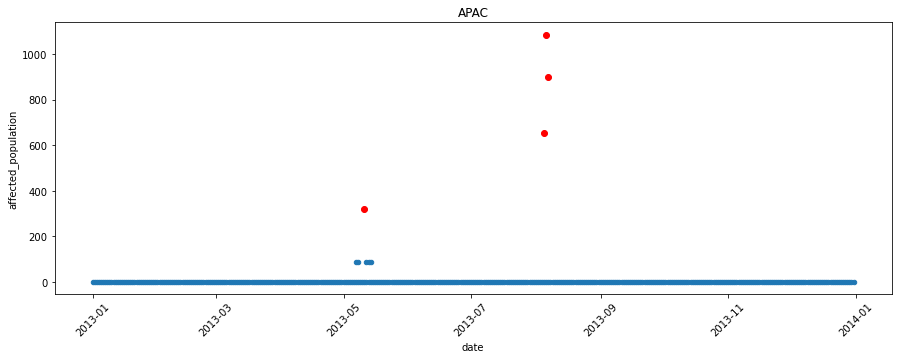

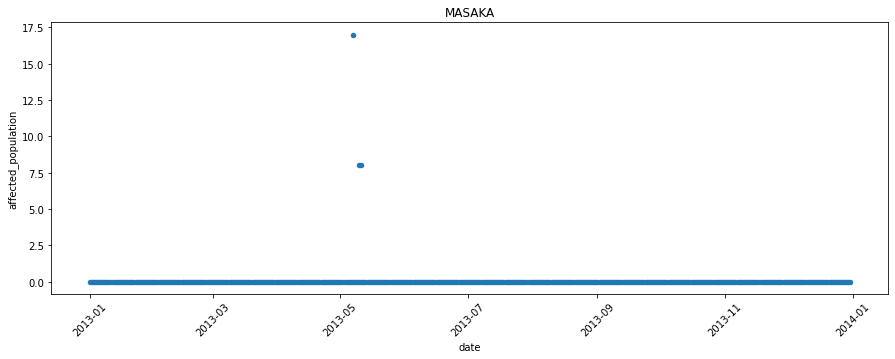

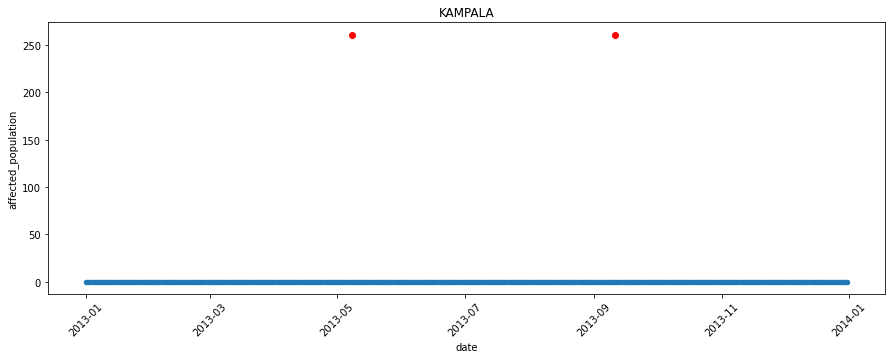

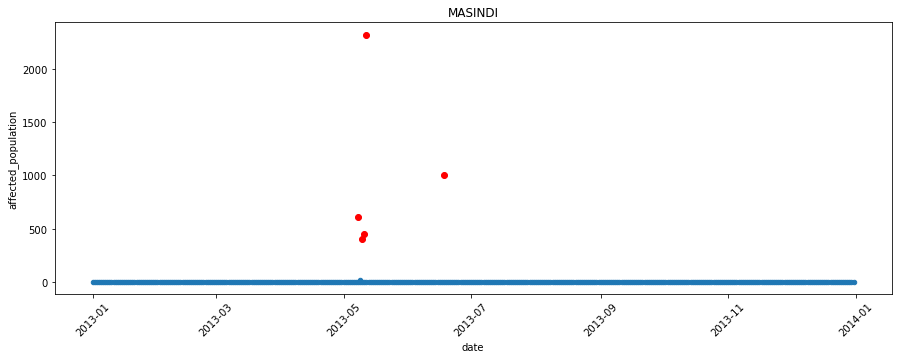

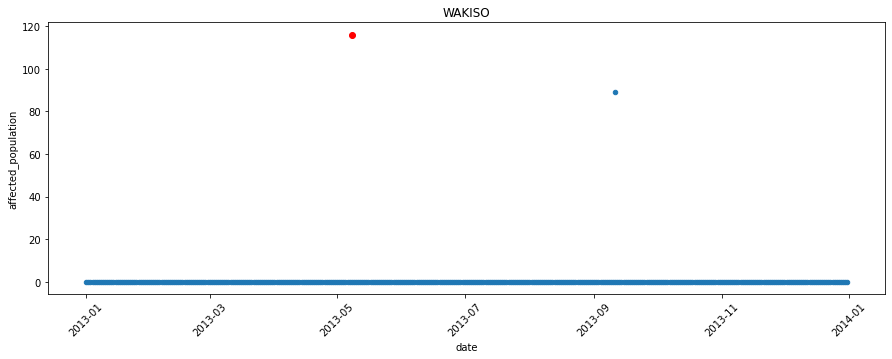

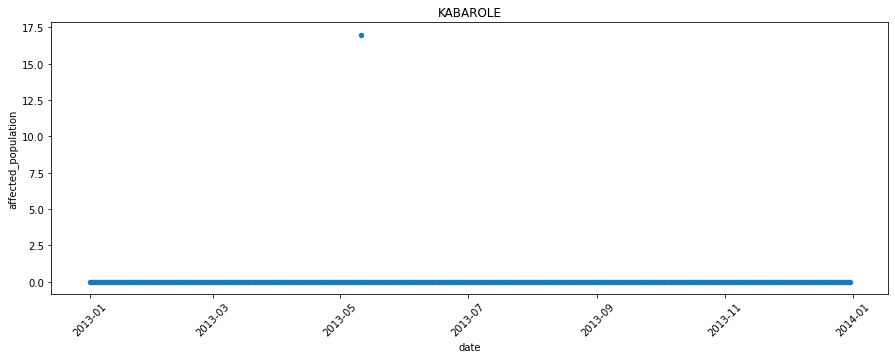

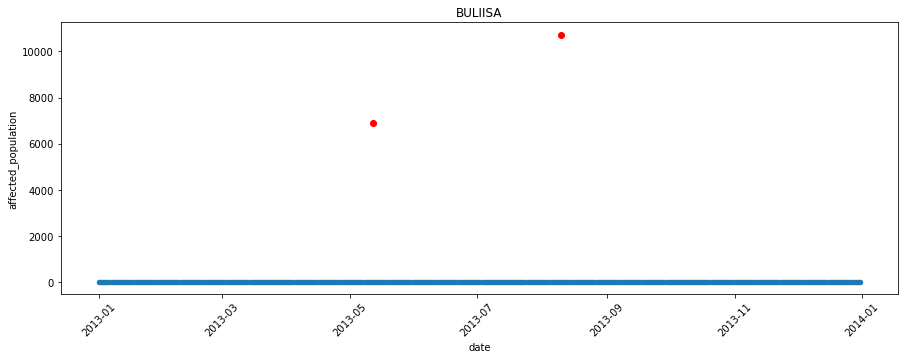

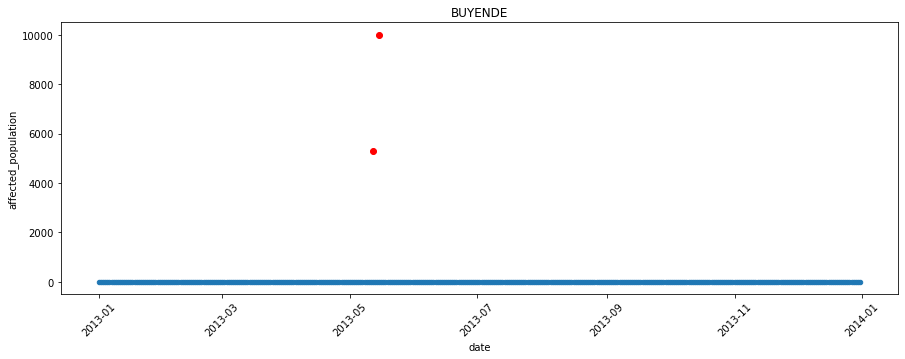

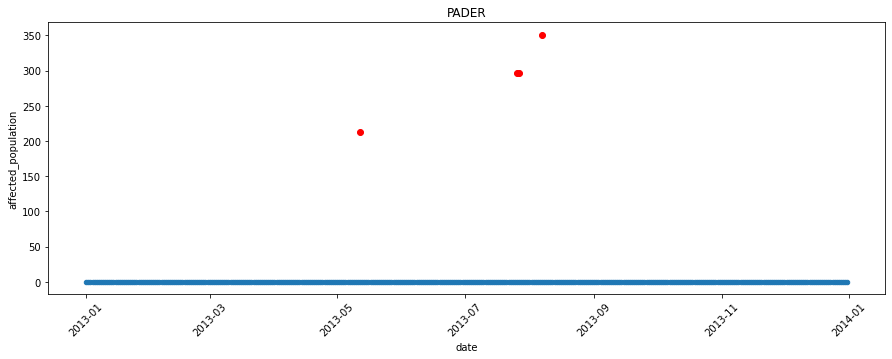

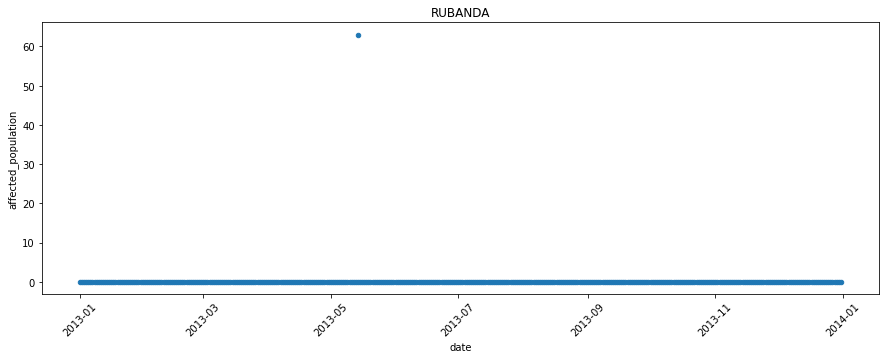

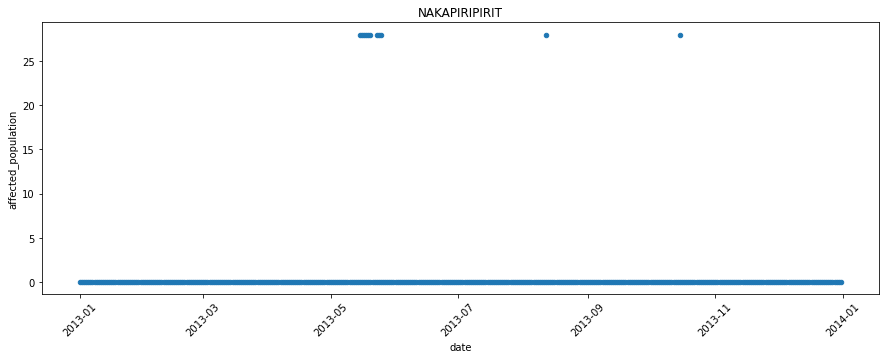

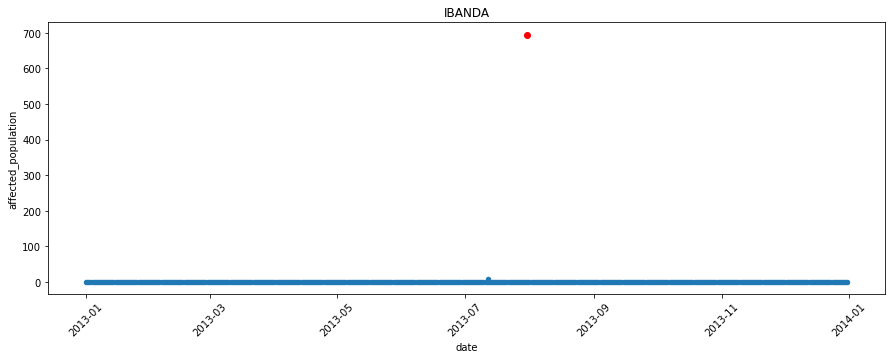

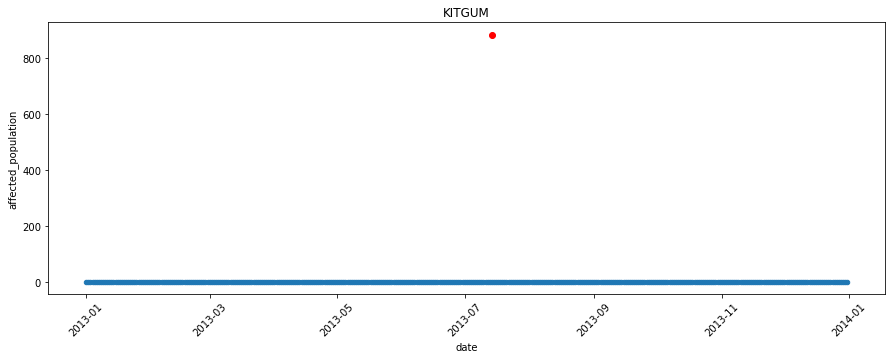

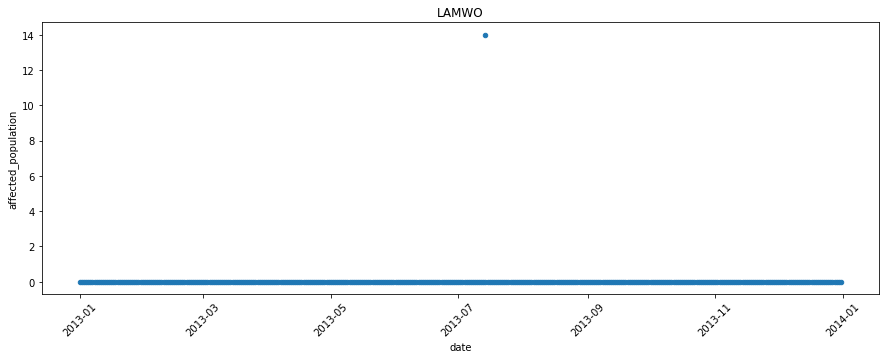

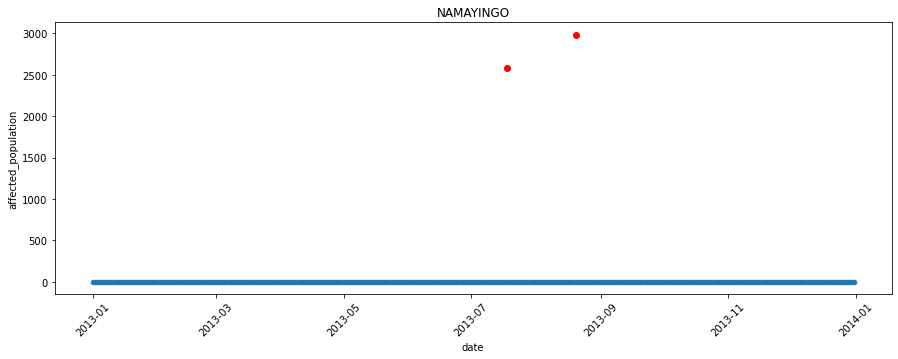

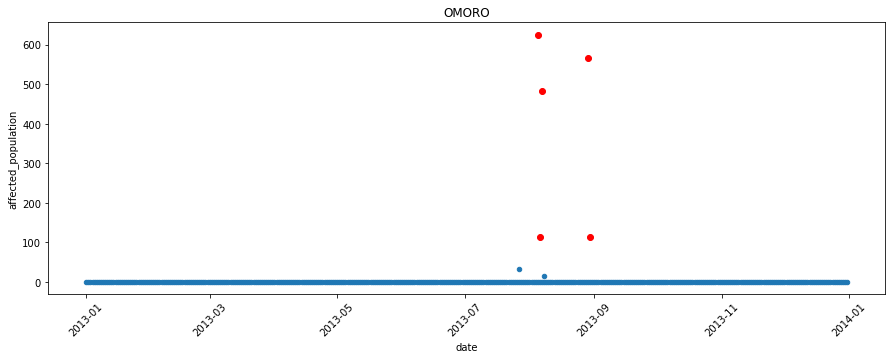

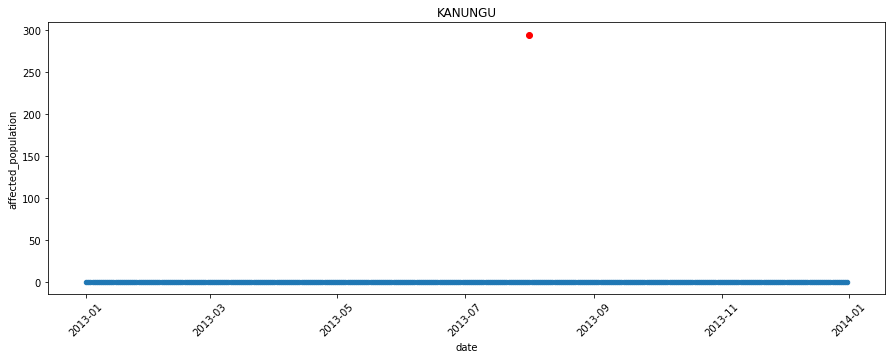

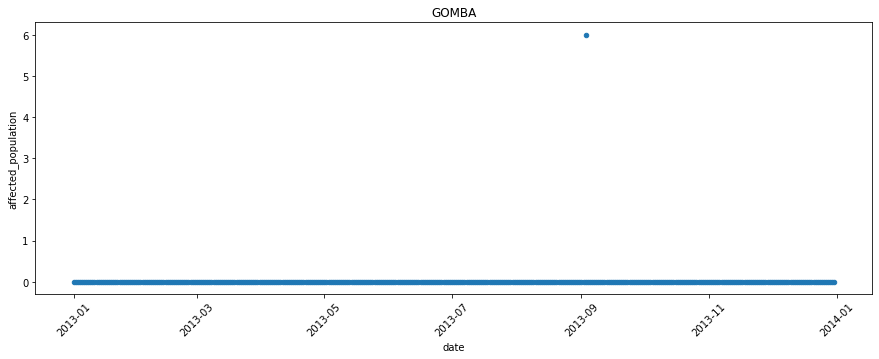

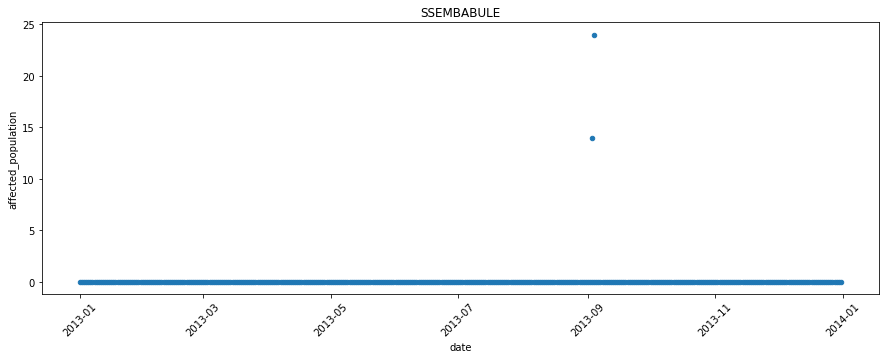

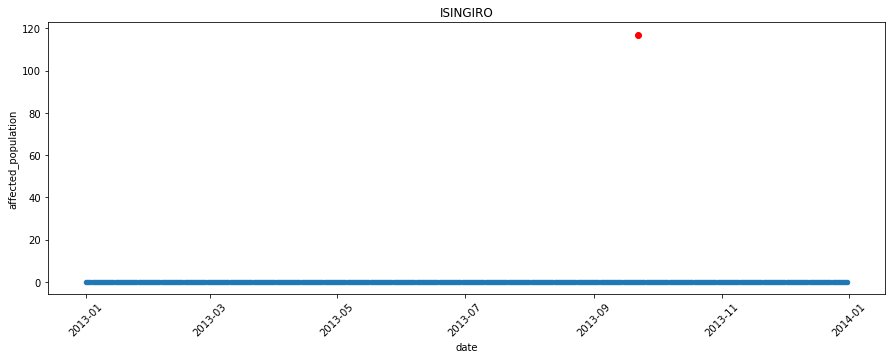

In [64]:
for district in df.district.unique():
    dfk = df[df.district==district]
    dfk.plot('date', 'affected_population', kind='scatter', figsize=(15,5))
    plt.xticks(rotation=45)
    plt.title(district)
    
    cutoff = dfk.affected_population.quantile([0.95])
    dfk = dfk[dfk.affected_population > cutoff.values[0]]
    dfk = dfk[dfk.affected_population > 100]
    plt.scatter(dfk.date, dfk.affected_population, c='red')
    
    plt.show()